# 📘 Entrega Final

**Nombre del alumno:** Stellato Alejandro Gustavo

## 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

### 1️⃣ Carga de datos
    Etapa 1. Actividad 1: Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.


In [77]:
# TODO: Cargar los datasets como DataFrames usando pandas.
# Sugerencia: utilizar pd.read_csv() para cargar los archivos CSV.
# Recordá verificar la ruta correcta y revisar las primeras filas con .head().

In [78]:
import pandas as pd
import numpy as np

In [79]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
ruta_datasets = "/content/drive/MyDrive/datasets"
os.listdir(ruta_datasets)

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_acotado.csv',
 'clientes_clean.csv',
 'marketing_clean.csv',
 'ventas_clean.csv']

In [81]:
# Se cargan los 3 csv, se verifican sus tamaños respectivos y se muestran las primeras filas con sus columnas.
df_ventas = pd.read_csv(ruta_datasets + "/" +"ventas.csv")
df_clientes = pd.read_csv(ruta_datasets + "/" +"clientes.csv")
df_marketing = pd.read_csv(ruta_datasets + "/" +"marketing.csv")

print("Forma del DataFrame ventas ->", df_ventas.shape)
display(df_ventas.head(5))

print("Forma del DataFrame clientes ->", df_clientes.shape)
display(df_clientes.head(5))

print("Forma del DataFrame marketing ->", df_marketing.shape)
display(df_marketing.head(5))

Forma del DataFrame ventas -> (3035, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


Forma del DataFrame clientes -> (567, 5)


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


Forma del DataFrame marketing -> (90, 6)


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


### SCRIPT EN PYTHON
    Etapa 1. Actividad 2
    Realizar un script básico que calcule las ventas mensuales utilizando
    variables y operadores.

In [82]:
#Funcion para leer archivo csv, sin importar csv y devuelve una lista de lista
def leer_csv(nombre_archivo):
    """
    Lee un archivo CSV separado por comas, sin usar el módulo 'csv' o 'pandas',
    y devuelve su contenido como una lista de listas.
    Cada sub-lista representa una fila del archivo.
    """
    datos = []

    try:
        # Abre el archivo en modo lectura ('r').
        # 'utf-8' es la codificación estándar y recomendable.
        with open(nombre_archivo, 'r', encoding='utf-8') as archivo:

            # Itera sobre cada línea del archivo
            for linea in archivo:

                # 1. Elimina el salto de línea al final (.strip())
                # 2. Divide la línea usando la coma como separador (.split(','))
                # 3. Usa una lista por comprensión para eliminar cualquier espacio extra
                #    que pueda haber al inicio o fin de cada valor (.strip() en cada valor)
                fila = [valor.strip() for valor in linea.strip().split(',')]

                # Asegúrate de no añadir listas vacías si hay líneas en blanco
                if fila and any(fila):
                    datos.append(fila)

    except FileNotFoundError:
        print(f"Error: El archivo '{nombre_archivo}' no fue encontrado.")
        return []
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return []

    return datos

In [83]:
#Lee archivo ventas.csv y lo guarda en una lista de lista
ventas_original = leer_csv(ruta_datasets + "/ventas.csv")

print (ventas_original)
#display (ventas_original)

[['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria'], ['792', 'Cuadro decorativo', '$69.94', '5', '02/01/2024', 'Decoración'], ['811', 'Lámpara de mesa', '$105.10', '5', '02/01/2024', 'Decoración'], ['1156', 'Secadora', '$97.96', '3', '02/01/2024', 'Electrodomésticos'], ['1372', 'Heladera', '$114.35', '8', '02/01/2024', 'Electrodomésticos'], ['1546', 'Secadora', '$106.21', '4', '02/01/2024', 'Electrodomésticos'], ['1697', 'Horno eléctrico', '$35.35', '9', '02/01/2024', 'Electrodomésticos'], ['1710', 'Plancha de vapor', '$65.43', '2', '02/01/2024', 'Electrodomésticos'], ['2959', 'Proyector', '$88.17', '9', '02/01/2024', 'Electrónica'], ['318', 'Rincón de plantas', '$79.86', '11', '03/01/2024', 'Decoración'], ['419', 'Candelabro', '$66.11', '8', '03/01/2024', 'Decoración'], ['1374', 'Aspiradora', '$95.90', '5', '03/01/2024', 'Electrodomésticos'], ['1571', 'Freidora eléctrica', '$111.18', '1', '03/01/2024', 'Electrodomésticos'], ['1814', 'Aspiradora', '$70.91', '2',

In [84]:
#Imprime nombre de columnas
columnas = ventas_original[0]
print (columnas)
print(len(ventas_original))

['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
3036


In [85]:
#ELIMINA FILAS DUPLICADAS
#convierte lista de lista a set de tuplas para eliminar filas duplicadas (los set solo pueden tener tener tuplas, no listas)
set_filas_unicas = set(tuple(sublista) for sublista in ventas_original[1:])
print(len(set_filas_unicas))

3000


In [86]:
#se crea una lista con filas sin duplicar desde el set previamente creado
ventas_unicas = []
#ventas_unicas.extend([columnas]) #copia el nombre de columnas
ventas_unicas.extend([list(tupla) for tupla in set_filas_unicas]) #añade el conjunto de tuplas convirtiendo cada una en listas
print(len(ventas_unicas))
print (ventas_unicas)

3000
[['1349', 'Batidora', '$100.89', '5', '27/10/2024', 'Electrodomésticos'], ['1877', 'Horno eléctrico', '$53.46', '4', '27/01/2024', 'Electrodomésticos'], ['2385', 'Auriculares', '$92.15', '4', '30/11/2024', 'Electrónica'], ['571', 'Lámpara de mesa', '$82.77', '9', '29/07/2024', 'Decoración'], ['1326', 'Secadora', '$109.40', '7', '18/10/2024', 'Electrodomésticos'], ['58', 'Rincón de plantas', '$58.70', '12', '31/10/2024', 'Decoración'], ['272', 'Cuadro decorativo', '$93.84', '10', '11/11/2024', 'Decoración'], ['980', 'Adorno de pared', '$75.85', '6', '16/12/2024', 'Decoración'], ['2059', 'Proyector', '$116.66', '12', '22/03/2024', 'Electrónica'], ['2414', 'Tablet', '$47.99', '5', '27/12/2024', 'Electrónica'], ['738', 'Rincón de plantas', '$29.42', '11', '25/05/2024', 'Decoración'], ['1189', 'Batidora', '$82.18', '6', '01/03/2024', 'Electrodomésticos'], ['2537', 'Cámara digital', '$74.10', '9', '20/08/2024', 'Electrónica'], ['227', 'Elementos de cerámica', '$32.11', '11', '17/11/2024

In [87]:
#Se crea un listado con los únicos mes/año (mm/yyyy)
mesanio = []
for linea in ventas_unicas:
    mesanio.append(linea[4][-7:])
set_mesanio=set(mesanio)#Se dejan solo los valores únicos pasandolo a set
mesanio_unicos = list(set_mesanio) # y luego a lista
mesanio_unicos.sort() #ordenada
print(mesanio_unicos)


['01/2024', '02/2024', '03/2024', '04/2024', '05/2024', '06/2024', '07/2024', '08/2024', '09/2024', '10/2024', '11/2024', '12/2024']


In [88]:
#Se crea un diccionario con clave "mm/yyyy" desde el listado anterior y valores a 0.0 float
totales_mensuales = {clave: 0.0 for clave in mesanio_unicos}
print(totales_mensuales)

{'01/2024': 0.0, '02/2024': 0.0, '03/2024': 0.0, '04/2024': 0.0, '05/2024': 0.0, '06/2024': 0.0, '07/2024': 0.0, '08/2024': 0.0, '09/2024': 0.0, '10/2024': 0.0, '11/2024': 0.0, '12/2024': 0.0}


In [89]:
#Se recorre la ventas y se sumarizan en el diccionario segun su clave
for lineas in ventas_unicas:
  #Hay valores string vacios por lo que se agrega un 0 antes,
  #Se quita el signo $, los decimales ya estan separados por punto
  #Ningún valor supera a 999.99 por lo que no hay separador de miles
  totales_mensuales[lineas[4][-7:]]+=float(("0"+lineas[2].replace("$","")))
print(totales_mensuales)

{'01/2024': 20097.33999999999, '02/2024': 18578.620000000003, '03/2024': 20078.93000000001, '04/2024': 20497.69000000001, '05/2024': 21445.86999999999, '06/2024': 16835.009999999995, '07/2024': 18184.120000000006, '08/2024': 19226.950000000008, '09/2024': 17793.469999999998, '10/2024': 17832.229999999992, '11/2024': 17636.58, '12/2024': 17516.56}


In [90]:
print("MES DE VENTA       IMPORTE")
for clave, valor in totales_mensuales.items():
    print(f"     {clave}       ${valor:.2f}")


MES DE VENTA       IMPORTE
     01/2024       $20097.34
     02/2024       $18578.62
     03/2024       $20078.93
     04/2024       $20497.69
     05/2024       $21445.87
     06/2024       $16835.01
     07/2024       $18184.12
     08/2024       $19226.95
     09/2024       $17793.47
     10/2024       $17832.23
     11/2024       $17636.58
     12/2024       $17516.56


###Estructura de datos
    Etapa 1. Actividad 3: Desarrollar un programa que almacene los datos de
    ventas (producto, precio, cantidad). Decidir si conviene utilizar
    diccionarios o listas.

In [91]:
#Se crea una lista de lista con las columnas producto,precio y cantidad
ventas_acotado= [[columnas[1],columnas[2],columnas[3]]]
display(ventas_acotado)
for linea in ventas_unicas:
  ventas_acotado.append([linea[1],float("0"+linea[2].replace("$","")),int("0"+str(linea[3]))]) #Hay precios y cantidad vacios
#display(ventas_acotado)

[['producto', 'precio', 'cantidad']]

In [92]:
#Se guarda en un archivo csv separado por punto y coma, sin importar el csv
delimitador=";"
archivo_ventas_acotado = ruta_datasets + "/ventas_acotado.csv"
try:
    with open(archivo_ventas_acotado, 'w', encoding='utf-8') as archivo:

        for sublista in ventas_acotado:
            # Convertir cada elemento de la sublista a string y unirlos con el delimitador
            linea_a_escribir = delimitador.join(str(elemento) for elemento in sublista)

            # Escribir la línea y añadir un salto de línea (\n)
            archivo.write(linea_a_escribir + '\n')

    print(f"✅ Datos guardados manualmente en '{archivo_ventas_acotado}'.")

except Exception as e:
    print(f"Error al guardar: {e}")

✅ Datos guardados manualmente en '/content/drive/MyDrive/datasets/ventas_acotado.csv'.


### 2️⃣ Análisis exploratorio inicial
    Etapa 1. Actividad 4: Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.


In [93]:
# TODO: Realizar un análisis exploratorio inicial de los DataFrames.
# Sugerencia: usar métodos como .info(), .describe(), .shape y .columns. dtypes.
# Esto te ayudará a entender la estructura y el contenido de los datos.
# Podés incluir comentarios sobre observaciones iniciales.

In [94]:
# Funcion para explorar inicialmente un DataFrame
def explorar_df(df, nombre):
    print(f"========== {nombre} ==========")
    print("Forma:", df.shape)
    print("Columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*50)
    print()

In [95]:
# Exploracion inicial de ventas
explorar_df(df_ventas, "ventas")

========== ventas ==========
Forma: (3035, 6)
Columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


--------------------------------------------------



In [96]:
# Exploracion inicial de clientes
explorar_df(df_clientes, "clientes")

========== clientes ==========
Forma: (567, 5)
Columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


--------------------------------------------------



In [97]:
# Exploracion inicial de marketing
explorar_df(df_marketing, "marketing")

========== marketing ==========
Forma: (90, 6)
Columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


--------------------------------------------------



### 3️⃣ Calidad de los datos
    Etapa 1. Actividad 5: Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos.
    Documentar el estado inicial de los datos.


In [98]:
# TODO: Identificar valores nulos y duplicados en los conjuntos de datos.
# Sugerencia: usar .isna().sum() y .duplicated().sum().
# Documentar las observaciones con print() o comentarios.

In [99]:

# ============================================
# 🔍 FUNCIÓN DE CONTROL DE CALIDAD DE DATOS
# ============================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de valores nulos por columna.
# 2️⃣ El total de filas completamente duplicadas.
# 3️⃣ Si se especifica una columna clave, los valores más repetidos de esa clave.

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """

    # -------------------------------------------------
    # Mostrar título descriptivo con el nombre del DF
    # -------------------------------------------------
    print(f"### {nombre}")

    # -------------------------------------------------
    # Mostrar cantidad de valores nulos por columna
    # -------------------------------------------------
    # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
    # .sum() cuenta los True (o sea, los nulos) por columna.
    # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.
    display(df.isna().sum().to_frame("nulos"))

    # -------------------------------------------------
    # Contar filas duplicadas completas
    # -------------------------------------------------
    # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # -------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna
    # -------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            # Mostrar solo los primeros 10 (los más repetidos)
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")
#fin de def calidad


In [100]:
# Analizo calidad de df_ventas
calidad(df_ventas, "ventas")
calidad(df_ventas, "ventas", "id_venta")

### ventas


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
No se indicó una clave para analizar duplicados por columna.
### ventas


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


    La cantidad de duplicados de todas las columnas coincide con la columna id_ventas: 70 filas

In [101]:
# Analizo calidad de df_clientes
calidad(df_clientes, "clientes")

### clientes


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
No se indicó una clave para analizar duplicados por columna.


    No hay filas duplicadas en df_clientes

In [102]:
# Analizo calidad de df_marketing
calidad(df_marketing, "marketing")

### marketing


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
No se indicó una clave para analizar duplicados por columna.


    No hay filas duplicadas en df_marketing

## 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

### 4️⃣ Limpieza de datos
    Etapa 2. Actividad 1: Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
    Documentar el proceso y los resultados.

- Eliminamos duplicados.
- Normalizamos **texto** en columnas `object` (trim + capitalización simple).
- Convertimos fechas a fechas reales
- Convertimos `precio` y `cantidad` a numéricos si existen.
- Guardamos CSV limpios.

In [103]:
# TODO: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
# Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
# Documentar el proceso y los resultados.

In [104]:
# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Se limpian y normalizan los DataFrames:
#   df_ventas, df_clientes, df_marketing
# ============================================

# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los originales
# -------------------------------------------------
df_ventas_clean = df_ventas.copy()
df_clientes_clean = df_clientes.copy()
df_marketing_clean = df_marketing.copy()

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
df_ventas_clean = df_ventas_clean.drop_duplicates()
df_clientes_clean = df_clientes_clean.drop_duplicates()
df_marketing_clean = df_marketing_clean.drop_duplicates()

In [105]:
# Solo se analiza df_ventas_clean porque es el unico DataFrame con filas
# duplicadas
calidad(df_ventas_clean, "VENTAS CLEAN", clave="id_venta")

### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.


In [106]:
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [df_ventas_clean, df_clientes_clean, df_marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)

In [107]:
print(df_ventas_clean.dtypes)
print(df_clientes_clean.dtypes)
print(df_marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [108]:
# -------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df


In [109]:
# -------------------------------------------------
#  Aplicar la normalización de texto
# -------------------------------------------------
df_ventas_clean = normalizar_texto(df_ventas_clean)
df_clientes_clean = normalizar_texto(df_clientes_clean)
df_marketing_clean = normalizar_texto(df_marketing_clean)


In [110]:
#mostramos los df luego de normalizar los textos para revisar que queden bien
print(df_ventas_clean.head(10))
print(df_clientes_clean.head(10))
print(df_marketing_clean.head(10))

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  
   id_cliente               nom

In [111]:
# -------------------------------------------------
# 6️⃣ Normalizar valores numéricos
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in df_ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    df_ventas_clean["precio"] = (
        df_ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    df_ventas_clean["precio"] = pd.to_numeric(df_ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN

print(df_ventas_clean.dtypes)
print(df_ventas_clean.columns)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria'],
      dtype='object')


In [112]:
print(df_ventas_clean.head(10))
print(df_clientes_clean.head(10))
print(df_marketing_clean.head(10))

   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  105.10       5.0  2024-01-02   
2      1156           Secadora   97.96       3.0  2024-01-02   
3      1372           Heladera  114.35       8.0  2024-01-02   
4      1546           Secadora  106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   65.43       2.0  2024-01-02   
7      2959          Proyector   88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   79.86      11.0  2024-01-03   
9       419         Candelabro   66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  
   id_cliente               nombre  edad  

In [113]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
df_ventas_clean.info()
df_ventas_clean.to_csv(ruta_datasets + "/" +"ventas_clean.csv", index=False)
df_clientes_clean.to_csv(ruta_datasets + "/" +"clientes_clean.csv", index=False)
df_marketing_clean.to_csv(ruta_datasets + "/" +"marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 164.1+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


### Reporte Global luego de la limpieza de datos

In [114]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================




In [115]:
print(reporte_calidad_global([df_ventas, df_clientes, df_marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([df_ventas_clean, df_clientes_clean, df_marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


### 5️⃣ Transformación de datos
    Etapa 2. Actividad 2: Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas
    que muestre solo los productos con alto rendimiento.
### Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.

Conceptos clave:

<h3>Transformación de datos:</h3> son operaciones que crean/derivan nuevas columnas (por ejemplo ingreso = precio * cantidad), normalizan formatos (texto/fechas/números) o filtran filas según un criterio.

<h3>Métrica de ingreso:</h3> para ventas, una métrica típica es ingreso por registro = precio * cantidad. Luego podemos agregar por producto (sumar ingresos y unidades) para medir rendimiento total por producto.

<h3>Agregación:</h3> es resumir muchas filas en pocas, aplicando funciones como sum(), mean(), count() agrupando por una clave (ej., producto).
Ej.: “ingreso total por producto” = suma de todos los ingresos de ese producto.

<h3>Percentil:</h3> el percentil 80 (P80) es un valor tal que el 80% de los datos están por debajo o igual a ese valor y el 20% restante por encima.

Si ingreso_total P80 = 120.000, significa que el 80% de los productos tienen ingreso_total ≤ 120.000 y el 20% ≥ 120.000.

<h3>Alto rendimiento:</h3> aquí lo definimos como top 20% de productos según ingreso_total (>= P80). Es un criterio común cuando no hay umbrales de negocio explícitos.
Alternativas válidas: top-K (p. ej. top 50 productos), percentil 75 (P75) o un umbral fijo de negocio (p. ej., “>= $100.000/mes”), o score estandarizado (z-score).

<h3>Plan paso a paso:</h3>

Detectar la columna de producto (tolerando distintos nombres: producto, id_producto, sku, articulo…).

Calcular ingreso por registro = precio * cantidad.

Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).

Calcular P80 con quantile(q=0.80).

Filtrar productos con ingreso_total >= P80.

Ordenar de mayor a menor.

In [116]:
# TODO: Aplicar filtros y transformaciones para crear una tabla de ventas
# que muestre solo los productos con alto rendimiento. calcular el percentil 80
# y filtrar los productos que superen ese umbral en ventas.
#quantile(0.8)
# Sugerencia: usar .query() o condiciones con operadores lógicos.

In [117]:
# ============================================
# 7) TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================

def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [118]:
# 1️⃣ Detectar la columna de producto
prod_col = encontrar_columna(df_ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)



producto


In [119]:
# 2️⃣ Calcular ingreso por registro = precio * cantidad
#() es para escribir en varias filas
df_ventas_perf = (
    df_ventas_clean
    .assign(
        ingreso = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#esta linea comentada es igual que la linea multiple de arriba
#ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
#esta otra linea agrega a ventas_clean una columna nueva ingreso y le asigna precio*cantidad
#ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]


In [120]:

# 3️⃣ Agregar métricas por producto
df_resumen_prod = (
    df_ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
)
#se puede escribir asi:
#resumen_prod = ventas_perf.groupby(by=prod_col).agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))



In [121]:
display(df_resumen_prod.head(10))
#ordenar resumen_prod por el mayor ingreso_total, y redondear precio_promedio a 2 decimales redondeado

,producto,ingreso_total,unidades,precio_promedio,registros
0,Adorno De Pared,48093.49,633.0,76.097800,100
1,Alfombra,44773.06,615.0,74.098300,100
2,Aspiradora,50085.86,651.0,77.447400,100
3,Auriculares,74175.58,958.0,76.302727,143
4,Batidora,50979.20,672.0,77.537200,100
5,Cafetera,59607.31,765.0,79.046581,117
6,Candelabro,11128.80,160.0,74.595417,24
7,Consola De Videojuegos,46174.41,623.0,76.346869,99
8,Cortinas,44865.03,610.0,73.649900,100
9,Cuadro Decorativo,54297.60,726.0,74.578000,100


In [122]:


# 4️⃣ Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = df_resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.


# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
# en una sola fila
#ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True
df_ventas_top = (
    df_resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


# 6️⃣ Mostrar resultados
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(df_ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,82276.38,1112.0,72.720625,176
1,Auriculares,74175.58,958.0,76.302727,143
2,Microondas,72562.89,912.0,79.176000,135
3,Cafetera,59607.31,765.0,79.046581,117
4,Cuadro Decorativo,54297.60,726.0,74.578000,100
5,Smartphone,54132.44,665.0,81.398416,101


### 6️⃣ Agregación
    Etapa 2. Actividad 3: Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
## 🟦 Punto 8 — Agregación (resumen por categoría y análisis de ingresos)
### Conceptos y plan

Objetivo: construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas, ticket promedio).

Conceptos clave:

Agregación: operación que resume muchas filas en menos filas, aplicando funciones (sum, mean, count, etc.) después de agrupar por una clave (aquí, la categoría).

Categoría de producto: atributo que agrupa productos similares (ej., “Electrónica”, “Hogar”). Puede llamarse categoria, rubro, etc.

Ticket promedio por venta: ingreso_total / ventas (dónde ventas es el conteo de filas en esa categoría). Indica el importe medio facturado por cada transacción/registro en la categoría.

Nota: esto no es el “precio promedio” del producto; ese ya se calcula con mean sobre precio.

Consideraciones: outliers pueden distorsionar promedios; a veces conviene mirar también la mediana (median).

Plan paso a paso:

Detectar la columna de categoría.

Asegurar columna ingreso (si no existe, crearla).

groupby(categoría).agg(...) para obtener métricas.

Ordenar por ingreso_total.

Calcular ticket_promedio_por_venta.

In [123]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.
# Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

In [124]:
# ============================================
# 8) AGREGACIÓN: resumen por categoría
# ============================================
# Requisitos:
# - 'df_ventas_clean' tiene columnas 'precio', 'cantidad' y alguna columna "categoría".
# ============================================

# -- Helper para detectar la columna de categoría --
def encontrar_columna(df, candidatos):
    """
    df: DataFrame de pandas que queremos inspeccionar.
    candidatos: iterable de strings con patrones posibles para el nombre de la columna
                (por ejemplo: ["categoria", "cat", "segmento"]).
    Devuelve:
      - El nombre de la PRIMERA columna cuyo nombre contenga alguno de los patrones (búsqueda por subcadena,
        sin distinguir mayúsculas/minúsculas).
      - None si no encuentra coincidencias.
    """

    # Recorremos todos los nombres de columnas del DataFrame (df.columns es un Index con esos nombres).
    for c in df.columns:

        # any(...) devuelve True si AL MENOS UNO de los elementos del generador interno es True.
        # Generador: (p in c.lower() for p in candidatos)
        #   - c.lower(): pasamos el nombre de la columna a minúsculas para comparar sin importar mayúsculas/minúsculas.
        #   - p in c.lower(): chequea si el patrón 'p' aparece como SUBCADENA dentro del nombre de la columna.
        #   - Se evalúa para cada 'p' en 'candidatos'.
        if any(p in c.lower() for p in candidatos):
           # Si encontramos una coincidencia, devolvemos inmediatamente el nombre ORIGINAL de la columna.
            return c
    # Si terminamos el bucle sin encontrar coincidencias, devolvemos None para indicar "no encontrada".
    return None

# Nota didáctica:
# - Esto hace coincidencia por SUBCADENA (ej.: "prod" matchea "producto_sku").
# - Si querés coincidencia EXACTA, usá igualdad (c.lower() == p) o expresiones regulares.
# - Si tus datos pueden tener acentos/espacios raros, podés normalizar:
#     import unicodedata, re
#     def norm(s): return re.sub(r'\s+', ' ', ''.join(ch for ch in unicodedata.normalize('NFKD', s)
#                                    if not unicodedata.combining(ch))).strip().lower()


# 1) Detectar columna de categoría (acepta variantes)
df_cat_col = encontrar_columna(df_ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if df_cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

# 2) Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in df_ventas_clean.columns:
    df_ventas_cat = df_ventas_clean.assign(ingreso = df_ventas_clean["precio"] * df_ventas_clean["cantidad"])
else:
    df_ventas_cat = df_ventas_clean.copy()

# 3) Agregación por categoría con groupby + agg
df_resumen_cat = (
    df_ventas_cat
    .groupby(
        by=df_cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
df_resumen_cat = df_resumen_cat.assign(
    ticket_promedio_por_venta = df_resumen_cat['ingreso_total'] / df_resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)

print("Columna de categoría detectada:", df_cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(df_resumen_cat.head(20))


Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592.0,1000,76.52096,505.299630
1,Electrónica,482577.80,6413.0,999,75.25492,483.060861
2,Decoración,479216.09,6490.0,1001,74.09800,478.737353


### 7️⃣ Integración de datos.
    Etapa 2. Actividad 4: Integración de Datos: Combinar los sets de datos de ventas y marketing
    para obtener una visión más amplia de las tendencias.


In [125]:
# TODO: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
# Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
# Documentar cualquier observación relevante sobre la combinación de datos.


In [126]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = df_ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * df_ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [127]:
#print(df_marketing_clean.head())
#filtrar df_marketing_clean por producto = "Lampara De Mesa".
#filtrar ventas_Clean por el periodo de fechas donde se hizo las campañas de marketing
#filtrar ventas_clean por "Lampara De Mesa"
df_mkt_filtrado = df_marketing_clean.query("producto == 'Lámpara De Mesa'")
print(df_mkt_filtrado)
df_ventas_clean_filtrado = df_ventas_clean.query("producto == 'Lámpara De Mesa'")
print(df_ventas_clean_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   Rrss   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     Tv   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10       5.0  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64      11.0  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20       6.0  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79       5.0  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32       9.0  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77       6.0  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35       2.0  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84       9.0 

In [128]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto
df_marketing_x_producto = df_marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [129]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto, todo por producto
df_merged = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(df_merged)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [130]:
#agrego columnna del % que me representa el costo sobre el ingreso
df_merged['porcentaje_costo_sobre_ingreso'] = (df_merged['costo'] / df_merged['precio_por_cantidad']) * 100
display(df_merged)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


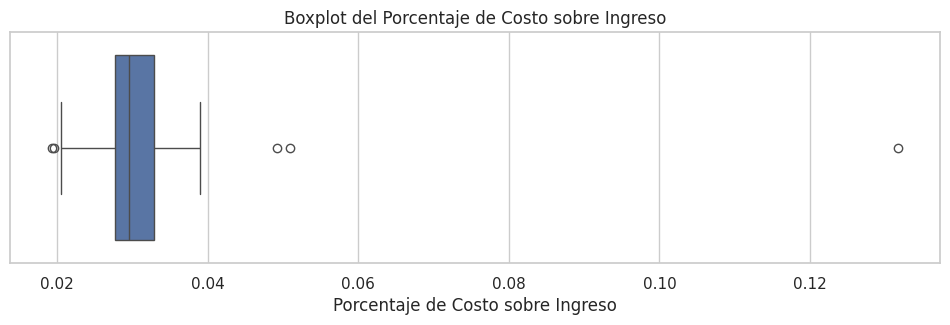

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to identify dispersion and potential outliers
plt.figure(figsize=(12, 3))
sns.boxplot(x=df_merged['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.show()

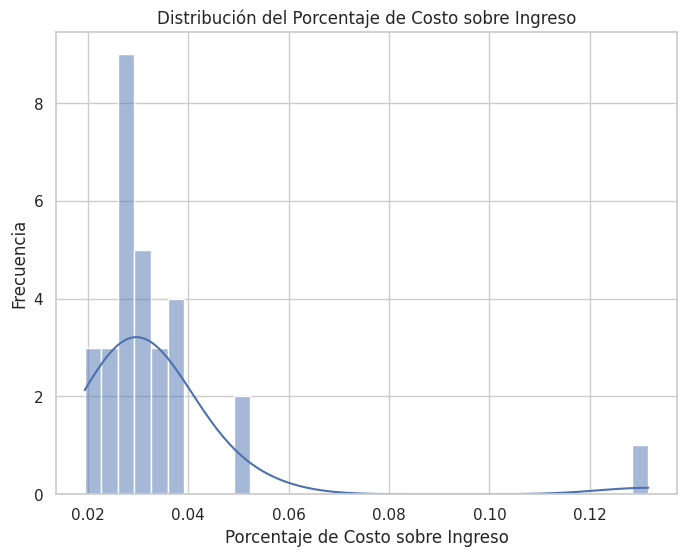

In [132]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_merged['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

##ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.


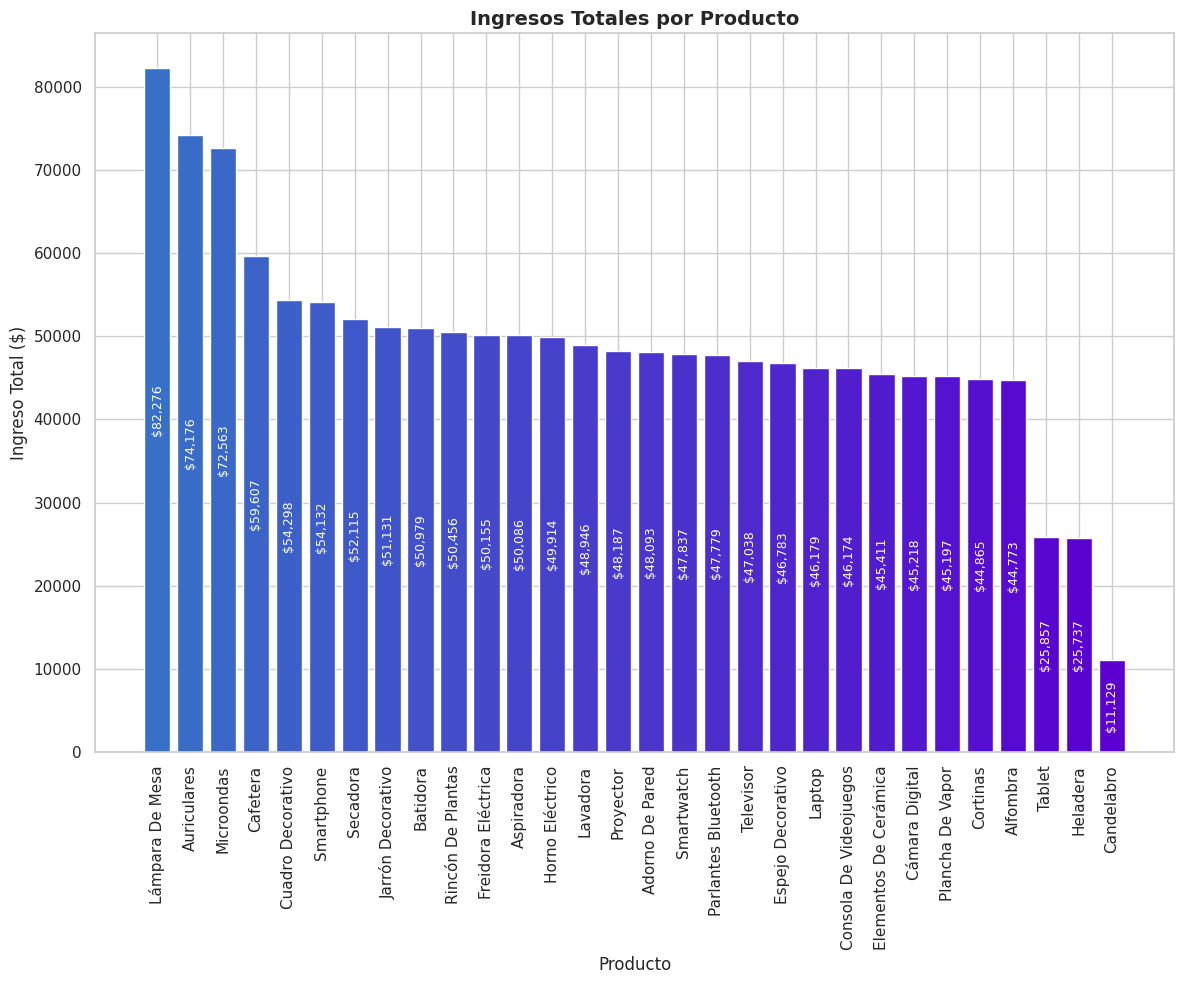

In [133]:
import matplotlib.colors as mcolors # Necesario para crear la mezcla de colores
import numpy as np                  # Necesario para calcular los rangos matemáticos

# el df que obtuvimos arriba resumen_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico
#df = df_ventas_top.copy()
df = df_resumen_prod.copy()
#df = df_resumen_cant.copy()

# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# import matplotlib.pyplot as plt    #Ya está importado

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable y el violeta para el degradado
color_celeste = "#386FC7"
color_violeta = "#5B00D1"

# --- INICIO BLOQUE NUEVO PARA DEGRADADO ---  gracias Gemini!!!!
# Creamos un mapa de color lineal que vaya del celeste al violeta
cmap = mcolors.LinearSegmentedColormap.from_list("mi_gradiente", [color_celeste, color_violeta])

# Generamos un array de colores según la cantidad de barras (de 0 a 1)
cantidad_barras = len(df_ordenado)
colores_gradiente = cmap(np.linspace(0, 1, cantidad_barras))
# --- FIN BLOQUE NUEVO ---

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=colores_gradiente aplica la lista de colores generada arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=colores_gradiente)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

##GRAFICO DE RESUMEN POR CATEGORIA

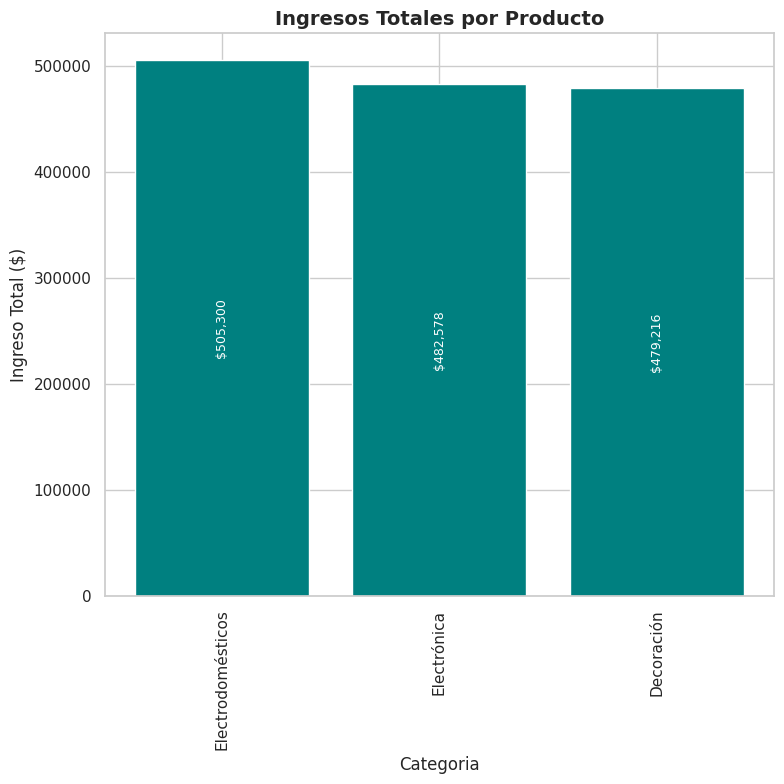

In [134]:
# el df que obtuvimos arriba resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df_cat = df_resumen_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
# import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df_cat.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
#color_celeste = "#D4722C"
color_Teal = "#008080"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_Teal)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Medidas de tendencia central del Subtotal
Estas medidas describen el valor típico de las ventas:

Media: promedio general.
Mediana: valor central de los datos ordenados.
Moda: valor que más se repite.

In [135]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0     11128.80
1     25736.80
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15    48187.00
16    48946.44
17    49913.90
18    50085.86
19    50155.15
20    50456.45
21    50979.20
22    51130.88
23    52115.45
24    54132.44
25    54297.60
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: float64


####Medidas de dispersión: Miden cuánto se alejan los valores entre sí:

####Rango = Máximo − Mínimo
####Varianza = Promedio de las desviaciones cuadradas
####Desviación estándar = Raíz cuadrada de la varianza

#### 📈 Interpretación:
Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

#### ¿Qué es la desviación estándar?

La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media).
Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.

In [136]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

#CALCULAR LA DESVIACION ESTANDAR Y EL RANGO DE CANTIDADES Y PRECIO_PROMEDIO DEL MISMO DATASET RESUMEN_PROD = DF

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 71147.58
Varianza: 175975127.62545466
Desviación estándar: 13265.561715413889


In [137]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


### Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**
- **Media (Promedio):** 48,903.12

- **Mediana:** 48,140.24

- **Desviación Estándar:** 13,265.56

- **Rango:** 71,147.58 (Máximo 82,276.38 - Mínimo 11,128.80)

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio= 48,903.12 y la mediana= 48,140.24 son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar de 13,265.56 indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media de $48,903.12, esta desviación es considerable (aproximadamente un 27% de la media).

3.  **Rango:**
    El rango de 71,147.58, que va desde el producto con menores ingresos (11,128.80) hasta el de mayores ingresos (82,276.38), confirma una amplia variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **alta desviación estándar** y el **amplio rango** de los ingresos totales por producto revelan una **variabilidad significativa**.

  Esto significa que no todos los productos generan ingresos de manera uniforme. Existen productos con un rendimiento muy superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas. La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general.

## Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [138]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


## Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − (1.5 × IQR)

Límite superior = Q3 + (1.5 × IQR)

In [158]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)].sort_values('ingreso_total')

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
6        Candelabro       11128.80     160.0        74.595417         24
14         Heladera       25736.80     330.0        74.127708         48
28           Tablet       25856.57     374.0        71.382586         58
5          Cafetera       59607.31     765.0        79.046581        117
20       Microondas       72562.89     912.0        79.176000        135
3       Auriculares       74175.58     958.0        76.302727        143
19  Lámpara De Mesa       82276.38    1112.0        72.720625        176


##ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

Buscamos patrones y tendencias en las ventas usando visualizaciones simples. A continuación se muestran un histograma (distribución) y un boxplot (dispersión/outliers) sobre los ingresos por producto ya calculados en etapas previas.

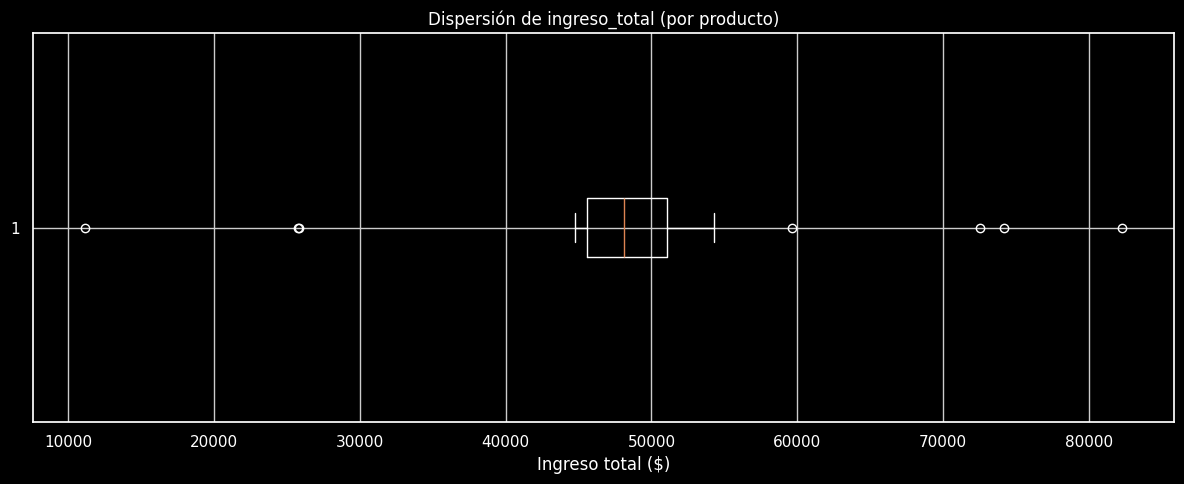

In [140]:
import matplotlib.pyplot as plt  # importamos matplotlib

df_vals = df_resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

# Agregamos facecolor='black' para el fondo de la imagen general
plt.figure(figsize=(12, 5), facecolor='black')                     # tamaño del gráfico

# Obtenemos el eje actual para pintarlo de negro también
ax = plt.gca()
ax.set_facecolor('black')

# Guardamos el gráfico en la variable 'bp' para poder editar sus colores
bp = plt.boxplot(df_vals, vert=False)                   # dibujamos boxplot vertical

# --- INICIO BLOQUE PERSONALIZACIÓN COLORES ---
# Recorremos los elementos que queremos pintar de blanco (caja, bigotes, topes)
# Omitimos 'medians' para que conserve su color original (naranja por defecto)
for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(bp[element], color='white')

# Opcional: Pintar los 'fliers' (puntos atípicos/outliers) de blanco también
plt.setp(bp['fliers'], markeredgecolor='white')

# Cambiamos el color de los bordes del gráfico y las marcas de los ejes a blanco
ax.tick_params(colors='white')      # Color de los números/marcas
for spine in ax.spines.values():    # Color del recuadro del gráfico
    spine.set_edgecolor('white')
# --- FIN BLOQUE PERSONALIZACIÓN COLORES ---

# Agregamos color='white' a los textos
plt.title('Dispersión de ingreso_total (por producto)', color='white')  # título
plt.xlabel('Ingreso total ($)', color='white') # Nota: En vert=False, el ingreso queda en el eje X, así que cambié ylabel por xlabel para que tenga sentido, si prefieres ylabel cámbialo de nuevo.
# plt.ylabel('Ingreso total ($)', color='white')                # etiqueta del eje Y (Original tuyo)

plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

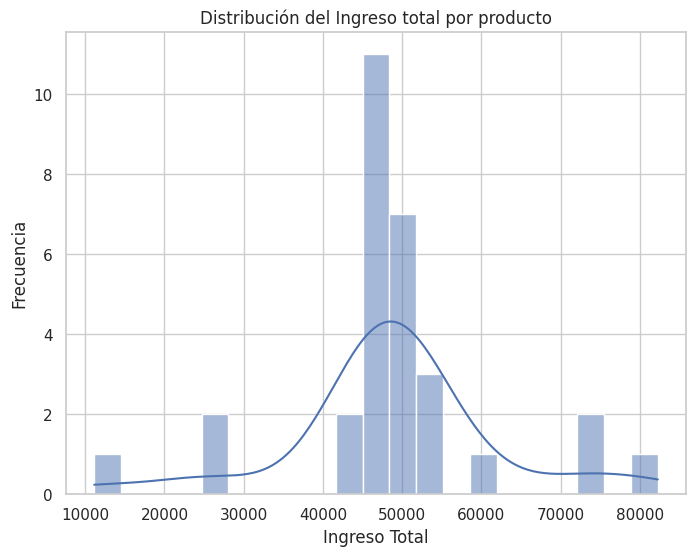

In [141]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

##Etapa 3: 3 Correlación
Evaluamos la relación entre precio_promedio y unidades por producto. Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva. También mostramos el coeficiente de correlación.

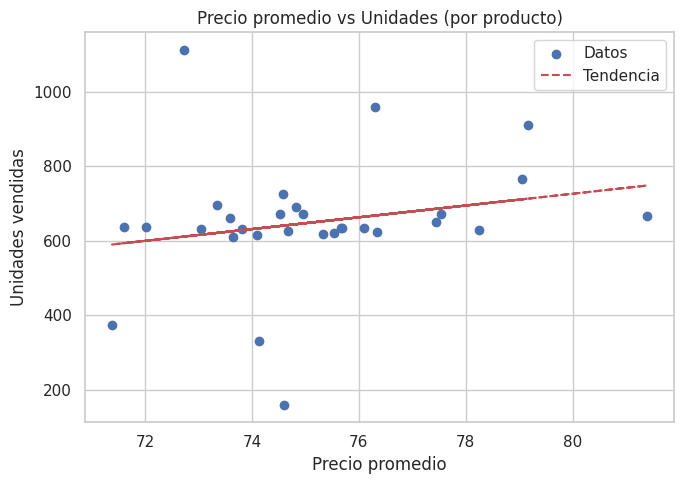

In [157]:
import matplotlib.pyplot as plt  # importamos matplotlib
import numpy as np               # <--- NUEVO: importamos numpy para cálculos matemáticos

x = df_resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = df_resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y,label = "Datos")                    # gráfico de puntos

# --- AGREGAR LÍNEA DE DISPERSIÓN (TENDENCIA) ---
z = np.polyfit(x, y, 1)              # ajustamos una recta (polinomio grado 1) a los datos
p = np.poly1d(z)                     # creamos una función con los coeficientes de esa recta
plt.plot(x, p(x), "r--", label="Tendencia")             # dibujamos la línea: "r--" significa rojo (red) y punteado
# -----------------------------------------------

plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.legend()
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar

In [143]:
#No hay una función para trazar la curva de correlación?
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = df_resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.



### 4.1 Visualización con Matplotlib (básica)
Gráficos de **líneas, barras y dispersión** comentados línea por línea.


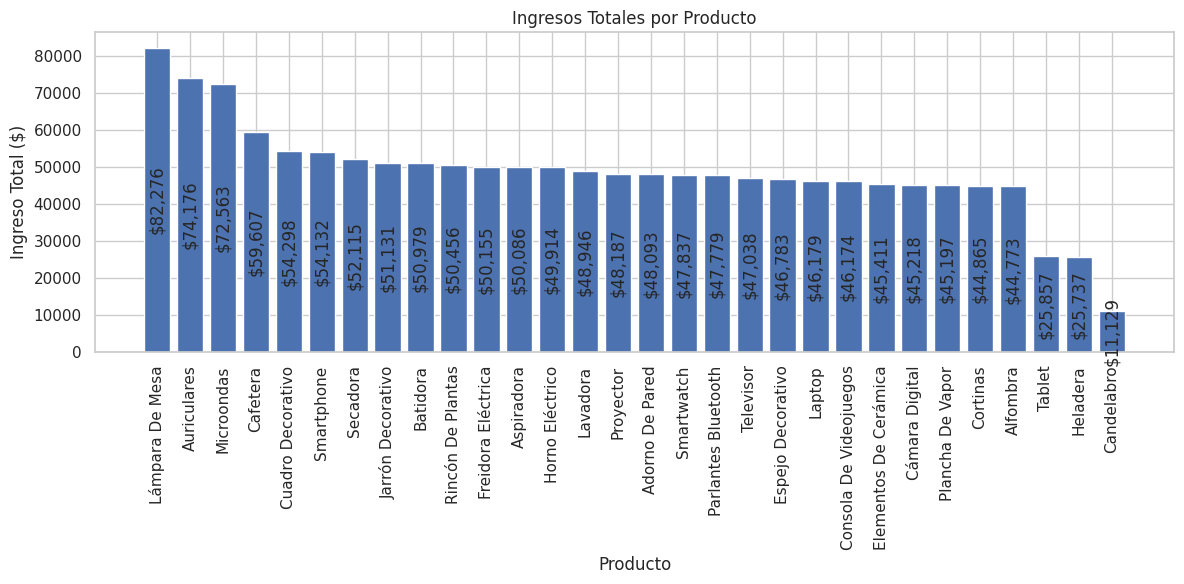

In [144]:

# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = df_resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


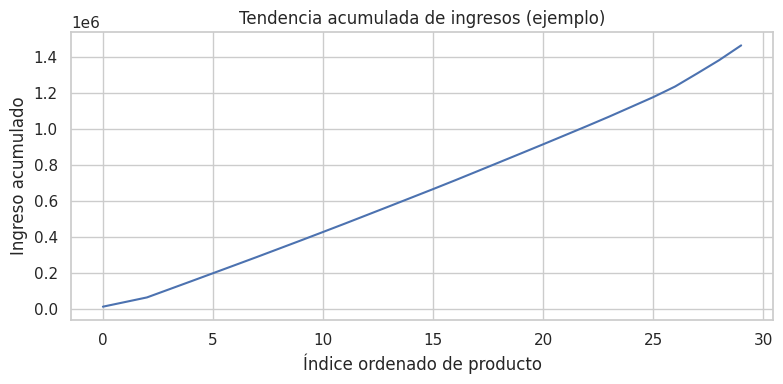

In [145]:

# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = df_resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


In [146]:

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
df_ventas_perf['fecha_venta'] = pd.to_datetime(df_ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = df_ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))


fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06    2899.60
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: float64


In [147]:
ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02       3751.26
2024-01-03       7353.10
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: float64


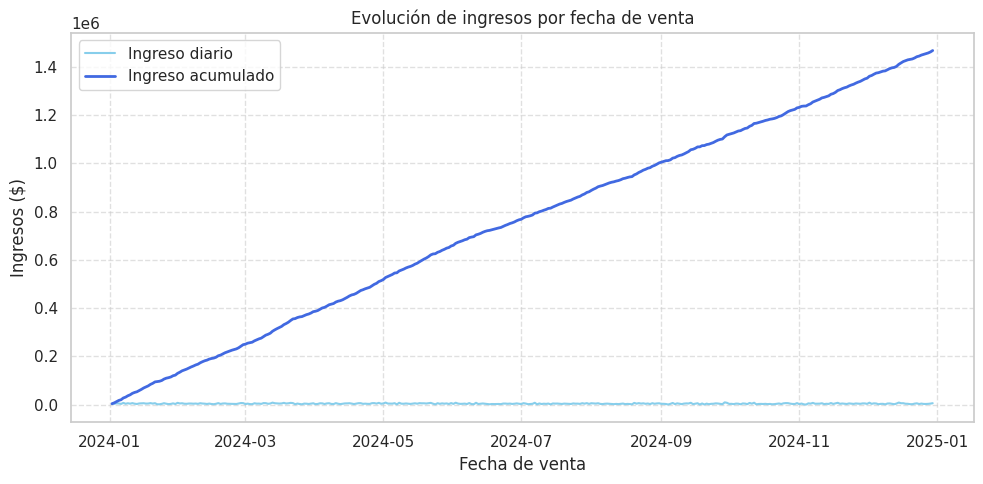

In [148]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'df_ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
df_ventas_perf['fecha_venta'] = pd.to_datetime(df_ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = df_ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10,5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).


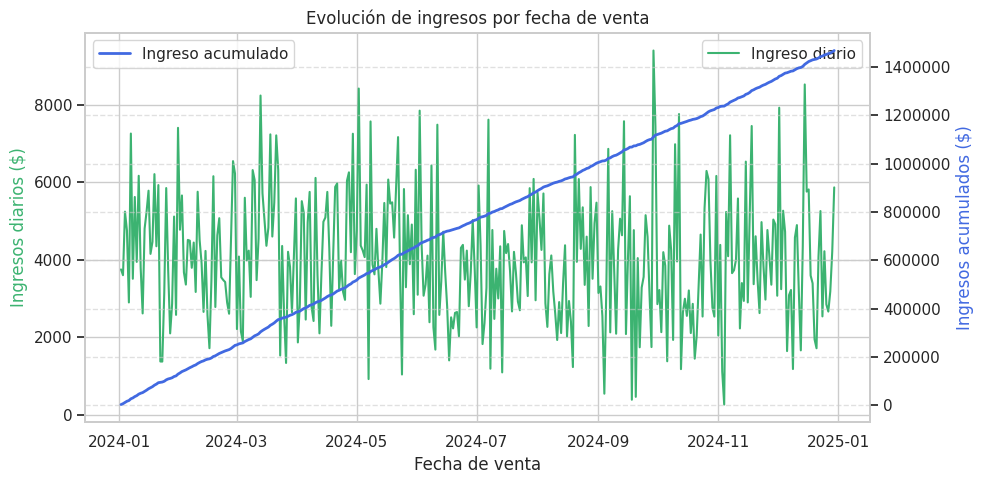

In [163]:
# 📉 Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))
#eje izquierdo ingresos diarios
ax1.plot(ingresos_por_dia, color='mediumseagreen', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='mediumseagreen')
ax1.ticklabel_format(style='plain', axis= 'y')
ax1.legend()

#eje derecho que son los ingresos acumulados
ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')
ax2.legend()
# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 4.2 Visualización Avanzada con Seaborn
Seaborn ofrece estilos y elementos estadísticos que mejoran la presentación.


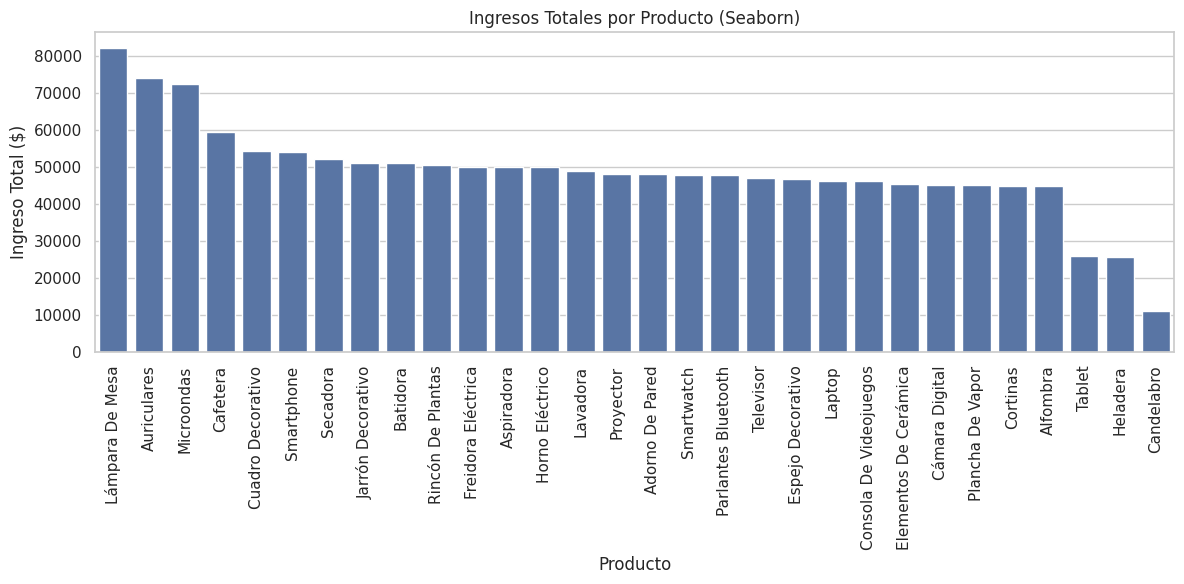

In [150]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = df_resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



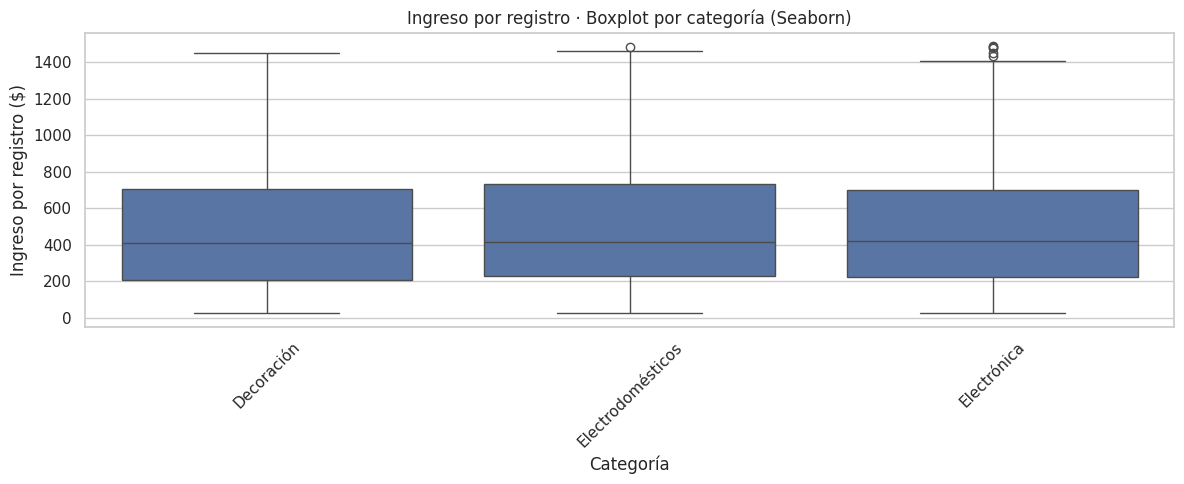

In [151]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=df_ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar



### 4.3 Presentación Final
Escribí un informe breve que resuma:
- **Productos líderes** y **categorías destacadas**.
- Diferencia **media vs. mediana** y su interpretación en estos datos.
- Presencia de **outliers** y su impacto.
- Recomendaciones sobre **qué productos potenciar** y **eficiencia de marketing**.


### 4.3 📘 Presentación Final — Conclusiones Integrales del Proyecto

Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo cómo la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### 🧾 ETAPA 1 y 2: Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  
- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  
- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### 📊 ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### 🔹 Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$51.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  
- **Mediana del ingreso_total:** ≈ \$48.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  
- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.  
- **Desviación estándar:** alrededor de \$10.000  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  
- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### 🔍 EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  
- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.  
- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### 🔗 Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> 📈 **r ≈ +0.28**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  
> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### 🎨 ETAPA 4: Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### 🧠 Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

#### 💡 Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.  
2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  
3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.  
4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  
5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

✅ **Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.


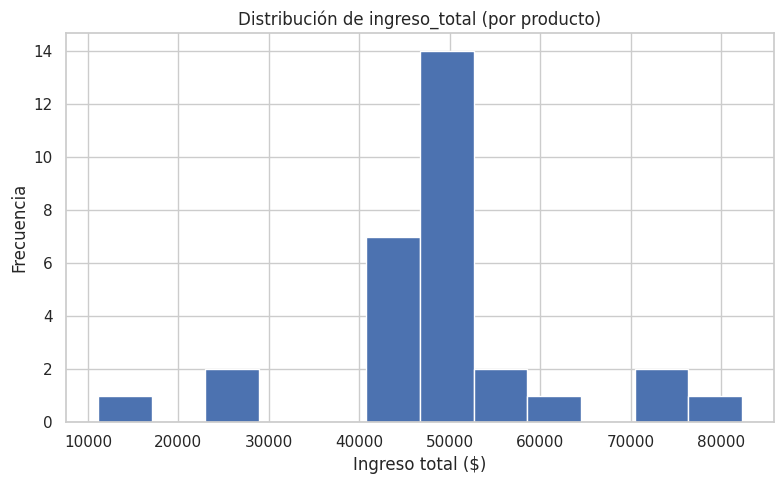

In [152]:

# =========================================
# 📈 Histograma: distribución de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = df_resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico
